In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [6]:
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
df.nunique()



gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
df.describe()


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


SEPERATING FEATURES INTO NUMERICAL AND CATEGORICAL FEATURES

In [20]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Numerical Features:',len(numerical_features),'\n',numerical_features)
print('Categorical Features:',len(categorical_features),'\n',categorical_features)

Numerical Features: 3 
 ['math_score', 'reading_score', 'writing_score']
Categorical Features: 5 
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


COMBINING SCORES TO EVALUATE THE TOTAL SCORE

In [36]:
df['Total score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['Total']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Average,average,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333,148
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333,229


In [51]:
df = df.drop('average', axis=1)

In [52]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


INSIGHT THAT STUDENTS ARE SCORING LESS IN MATHS AND GOOD IN READING


In [59]:
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [60]:
reading_less_20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average'].count()
math_less_20 = df[df['math_score'] <= 20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


EXPLORING DATA (VISUALIZATION)

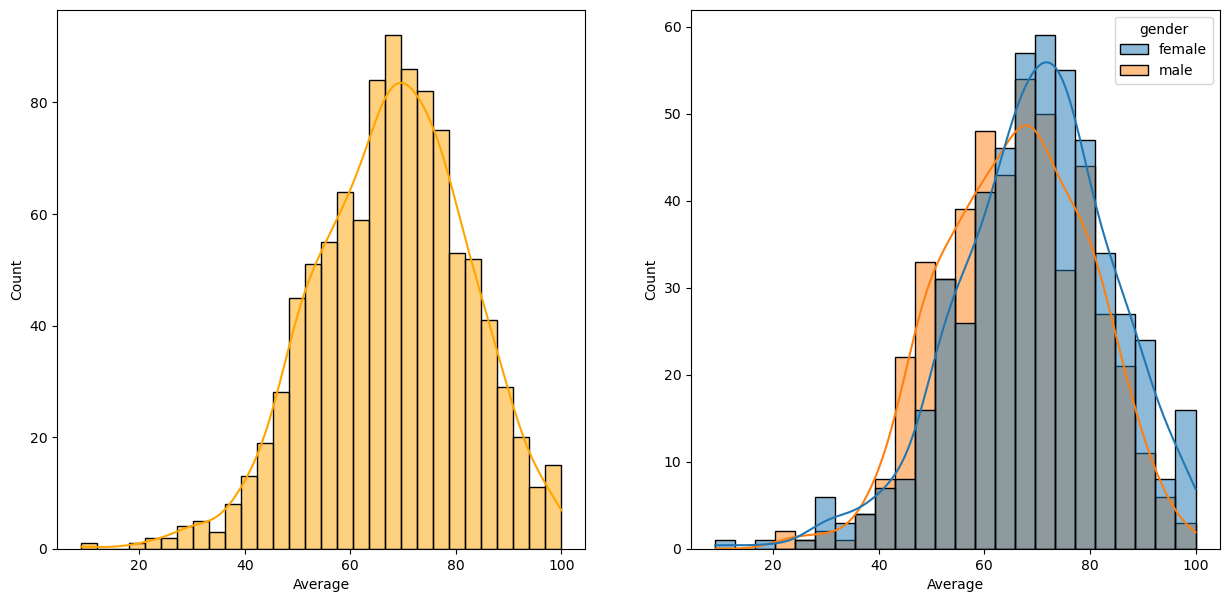

In [61]:
import seaborn as sns
fig,axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='orange')
plt.subplot(122)   
sns.histplot(data=df,x='Average',hue='gender',kde=True)
plt.show()

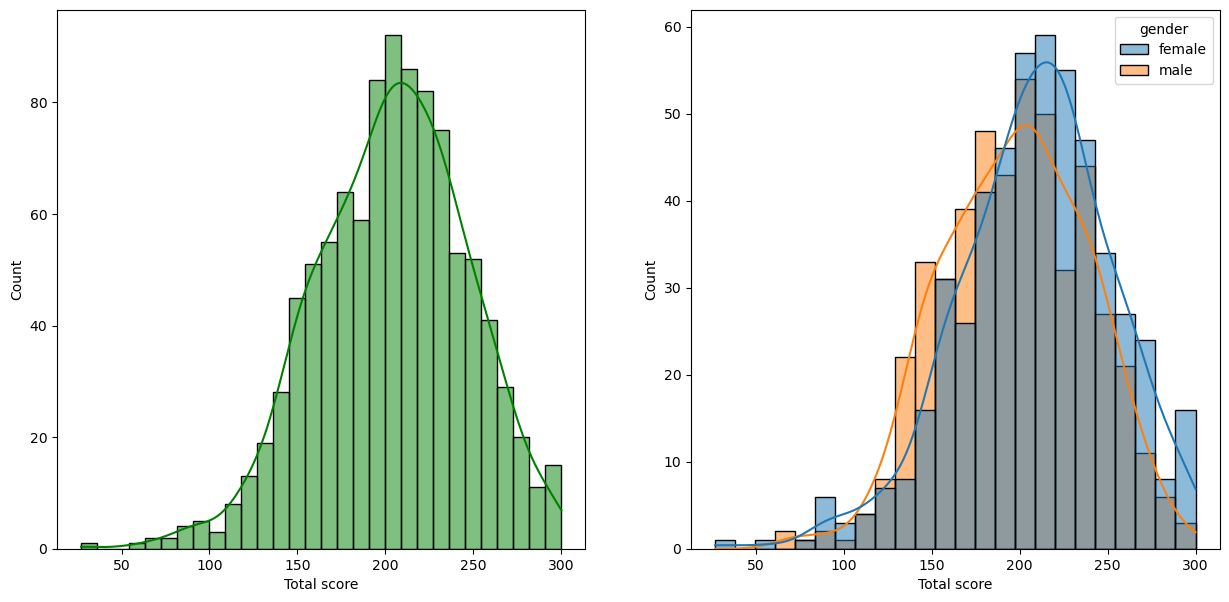

In [62]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total score', bins=30, kde= True, color='green')
plt.subplot(122)
sns.histplot(data=df,x='Total score', hue='gender', kde=True)
plt.show()

FEMALE STUDENTS TENDS TO PERFORM WELL THAN MALE

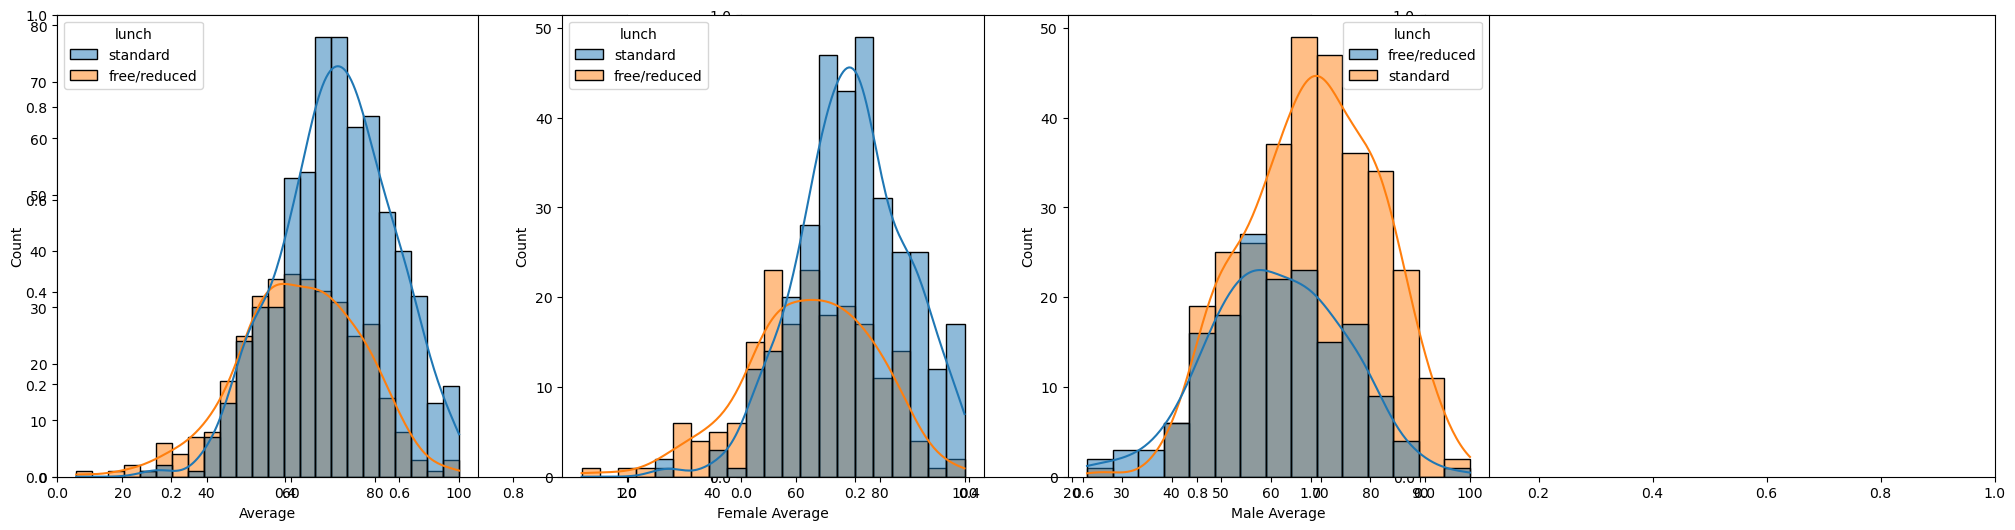

In [68]:
fig,axs =plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average',hue='lunch',kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',hue='lunch',kde=True)
plt.xlabel('Female Average')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',hue='lunch',kde=True)
plt.xlabel('Male Average')
plt.show()


INSIGHTS------->
STANDARD LUNCH HELPS THE PERFORMANCE IN EXAM BE IT MALE OR FEMALE STUDENTS

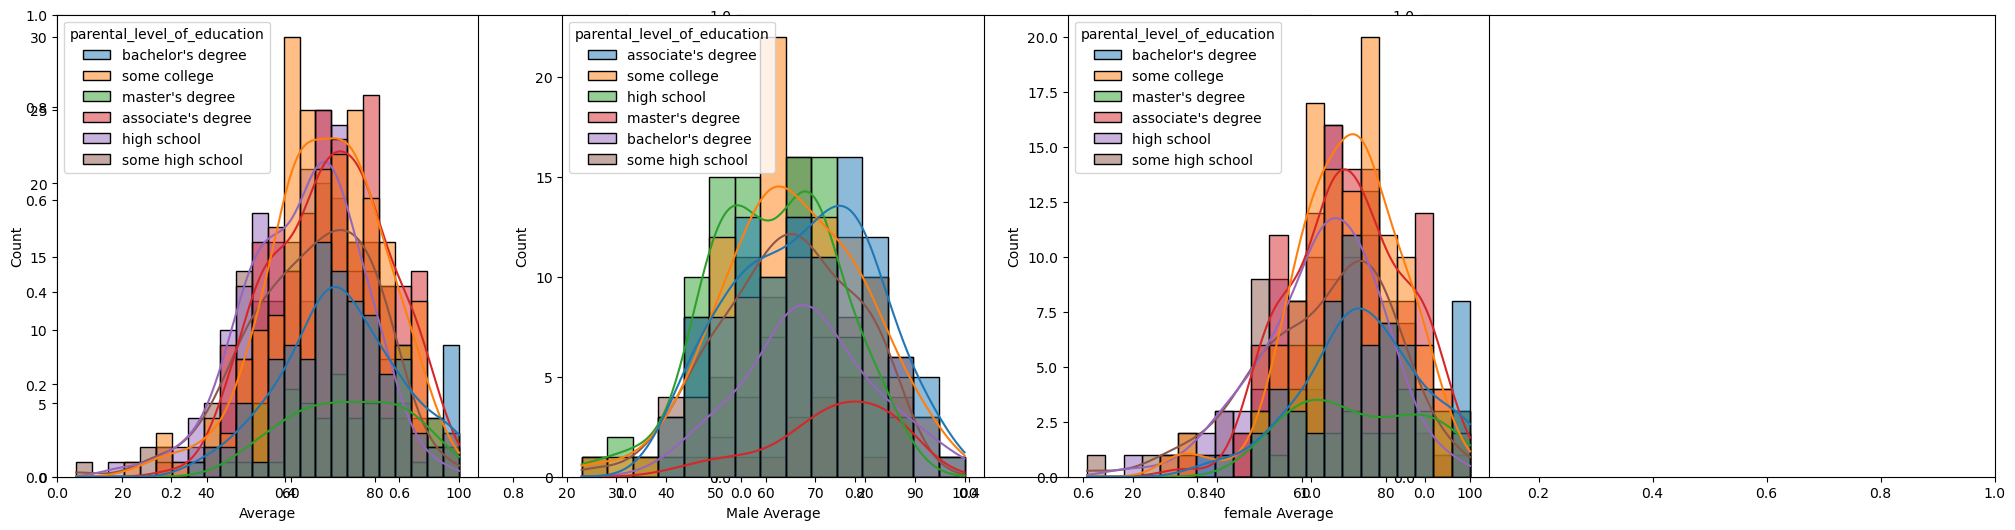

In [72]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.xlabel('Male Average')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.xlabel('female Average')
plt.show()

 INSIGHTS-----> Parental education level has a positive impact on student performance for both genders.

Male students benefit notably when parents have associate’s or bachelor’s degrees.

Female students show a stronger improvement with higher parental education, especially with bachelor’s/master’s.

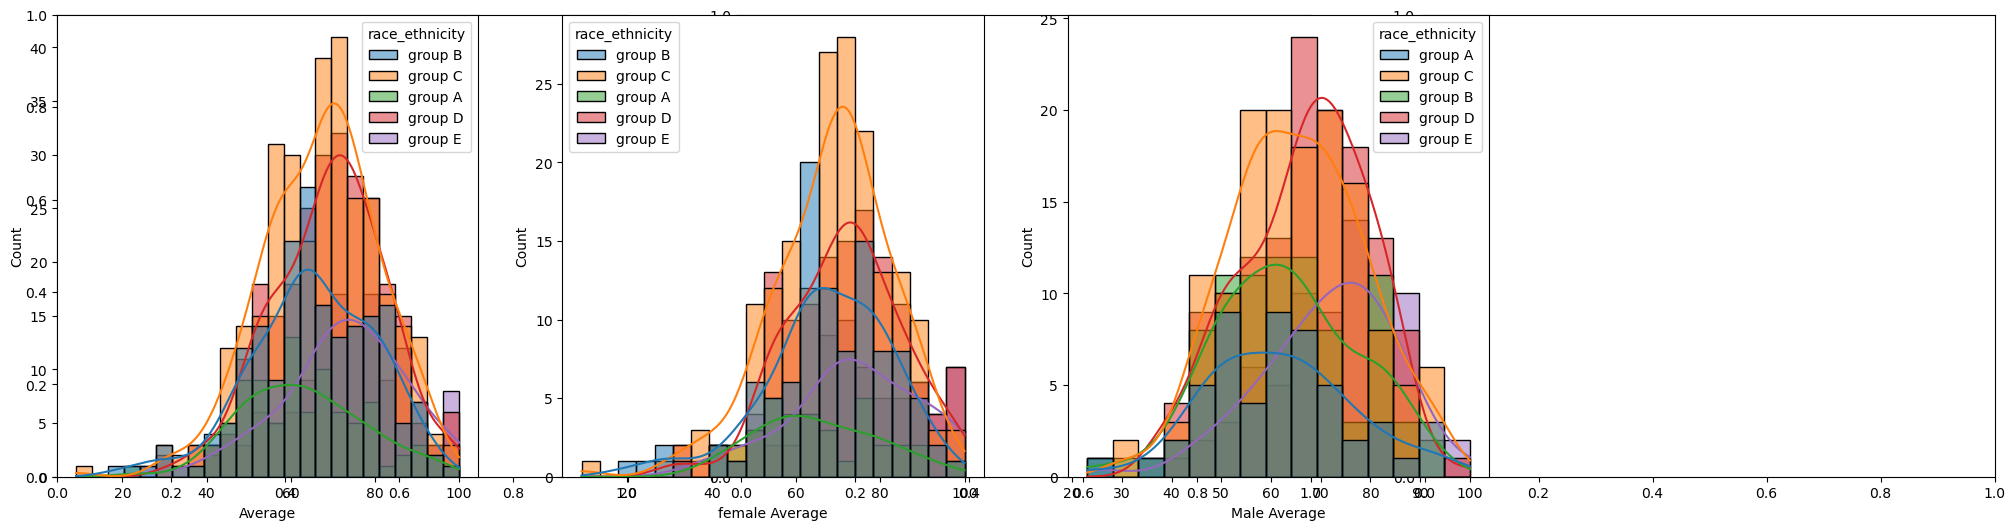

In [76]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.xlabel('female Average')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.xlabel('Male Average')
plt.show()

INSIGHTS------>
  
Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

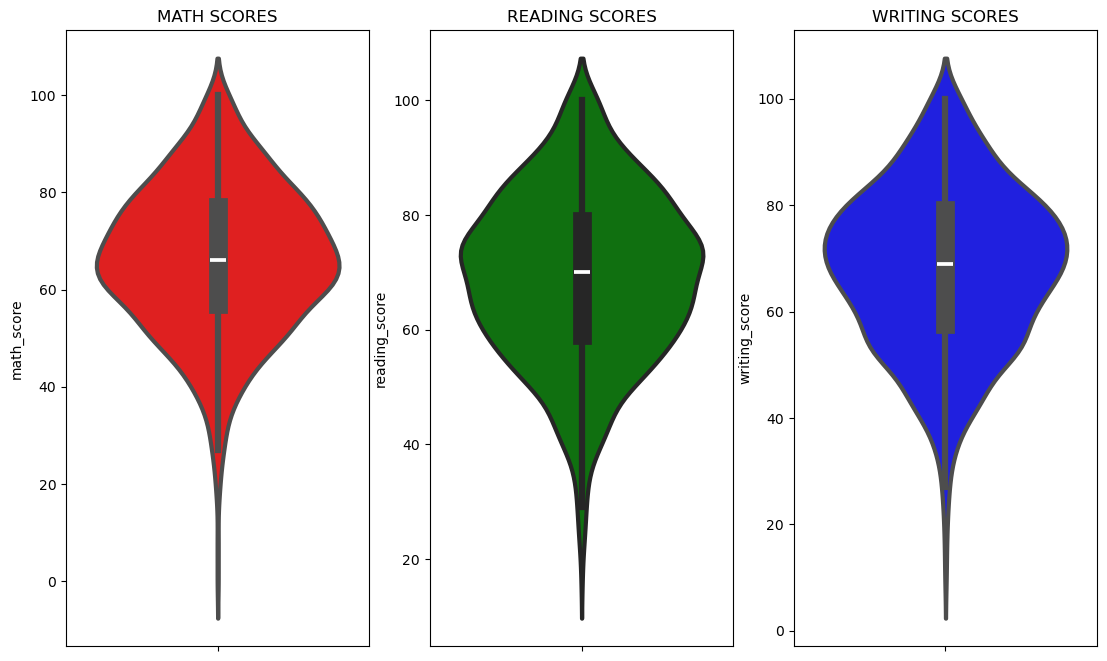

In [80]:

plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(142)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(143)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

INSIGHTS-----> - From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

MULTIVARIATE ANALYSIS USING PIEPLOT

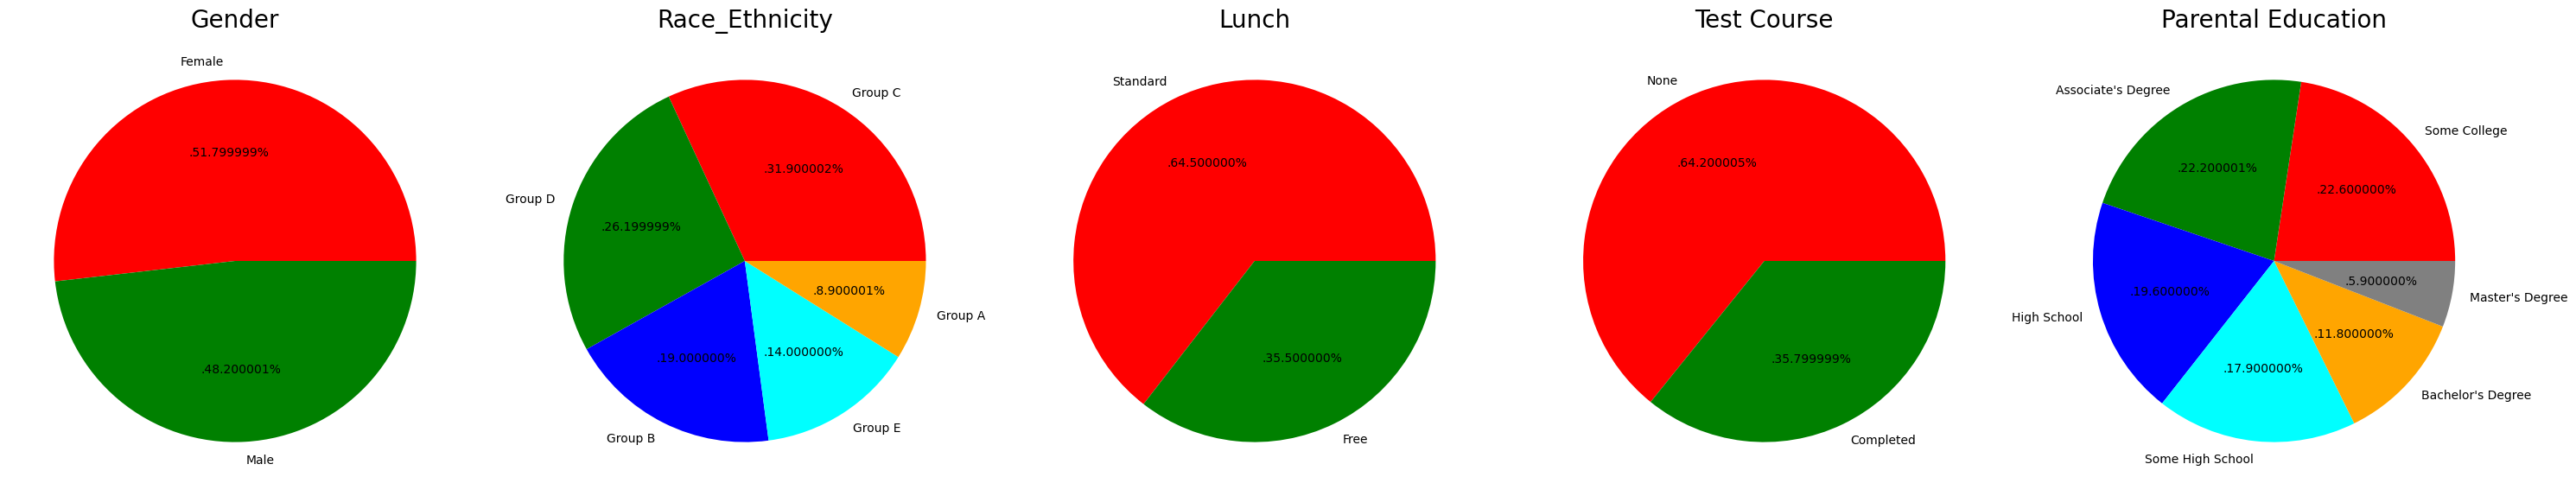

In [84]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')
plt.tight_layout()
plt.grid()




plt.show()

INSIGHTS----->

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

FEATURE WISE VISUALIZATION

UNIVARIATE ANALYSIS (HOW IS DISTRIBUTION OF GENDER)

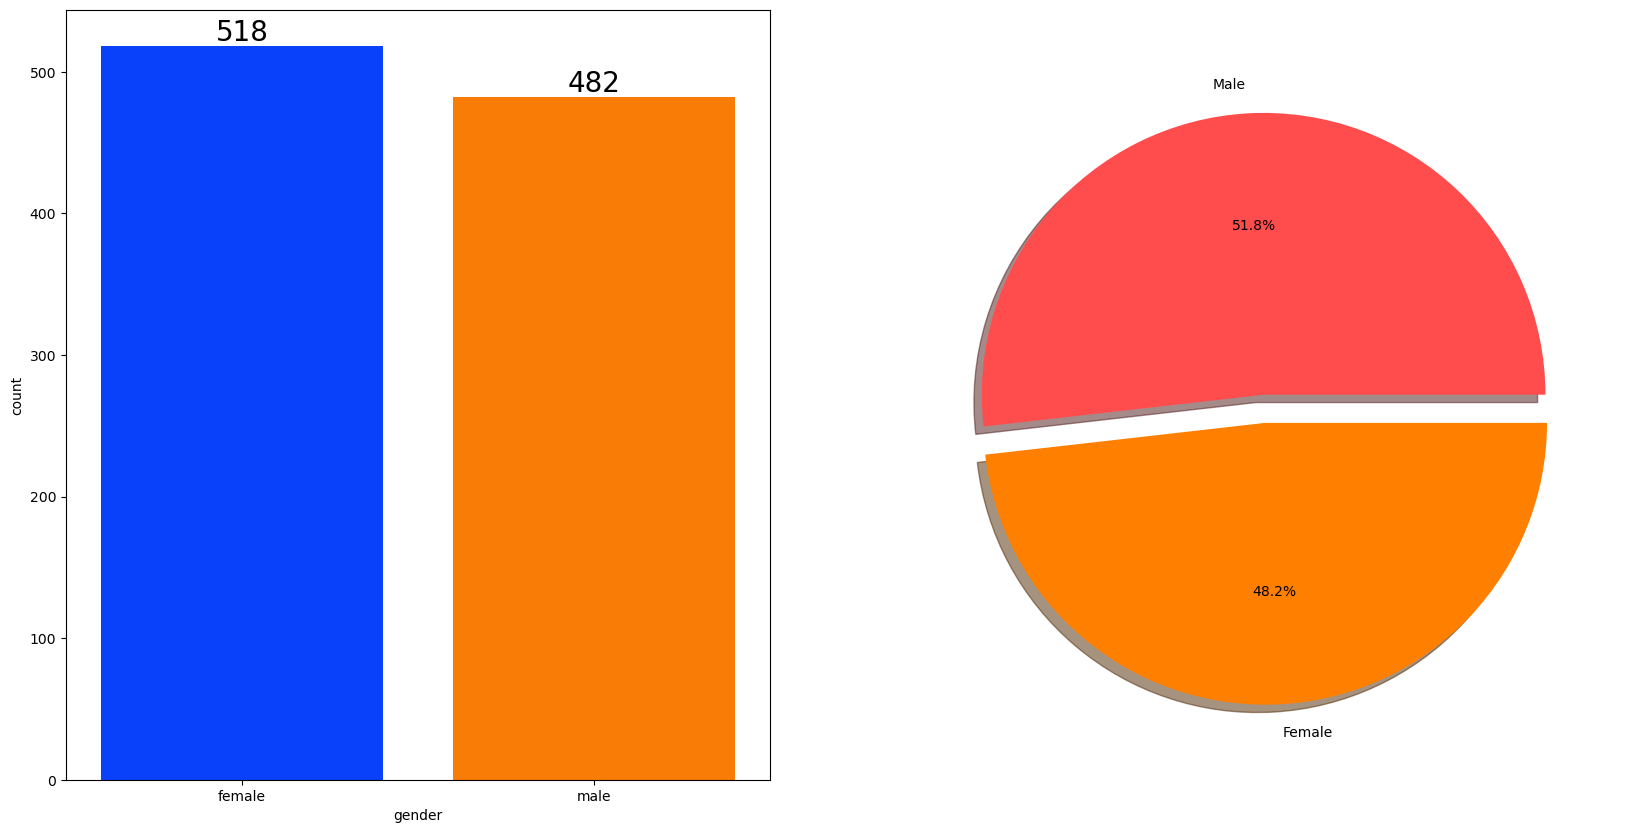

In [88]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

INSIGHTS----->
 Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

BIVARIATE ANALYSIS(IF THEIR IS ANY IMPACT ON STUDENTS PERFORMANCE BASED ON GENDER)

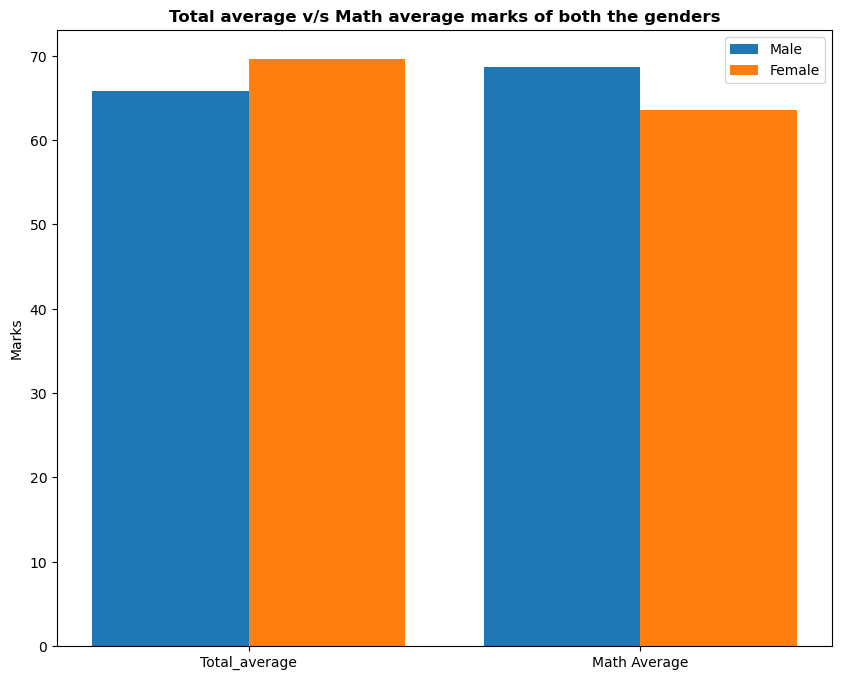

In [94]:
gender_group = df.groupby('gender')[['Average', 'math_score']].mean()
gender_group
plt.figure(figsize=(10, 8))

X = ['Total_average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

INSIGHTS----> 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

RACE_EHNICITY COLUMN

  How is Group wise distribution ?
  
  Is Race/Ehnicity has any impact on student's performance ?

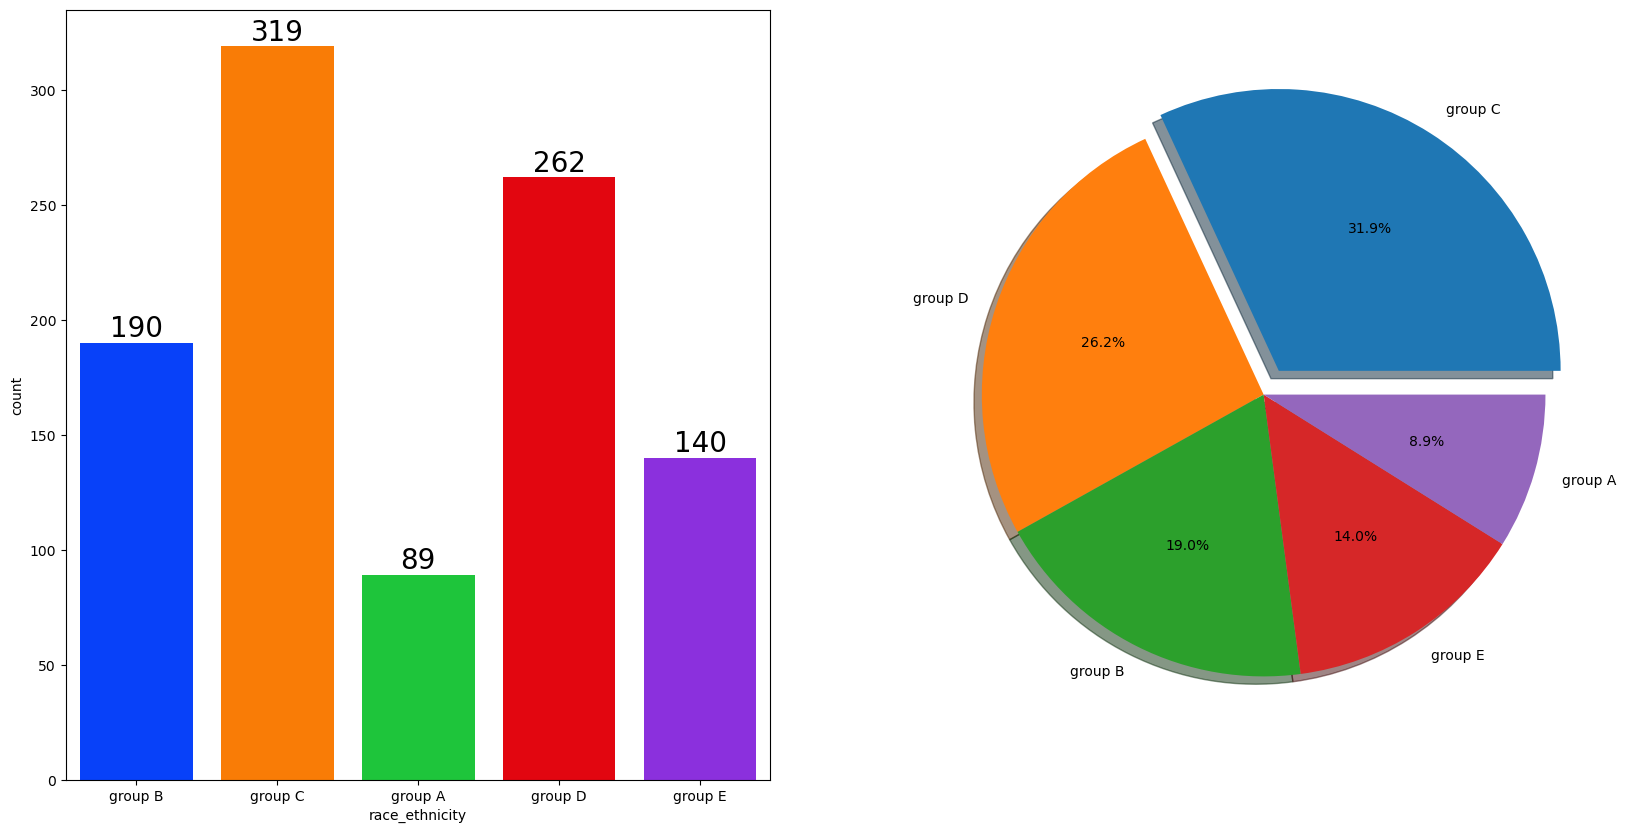

In [96]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

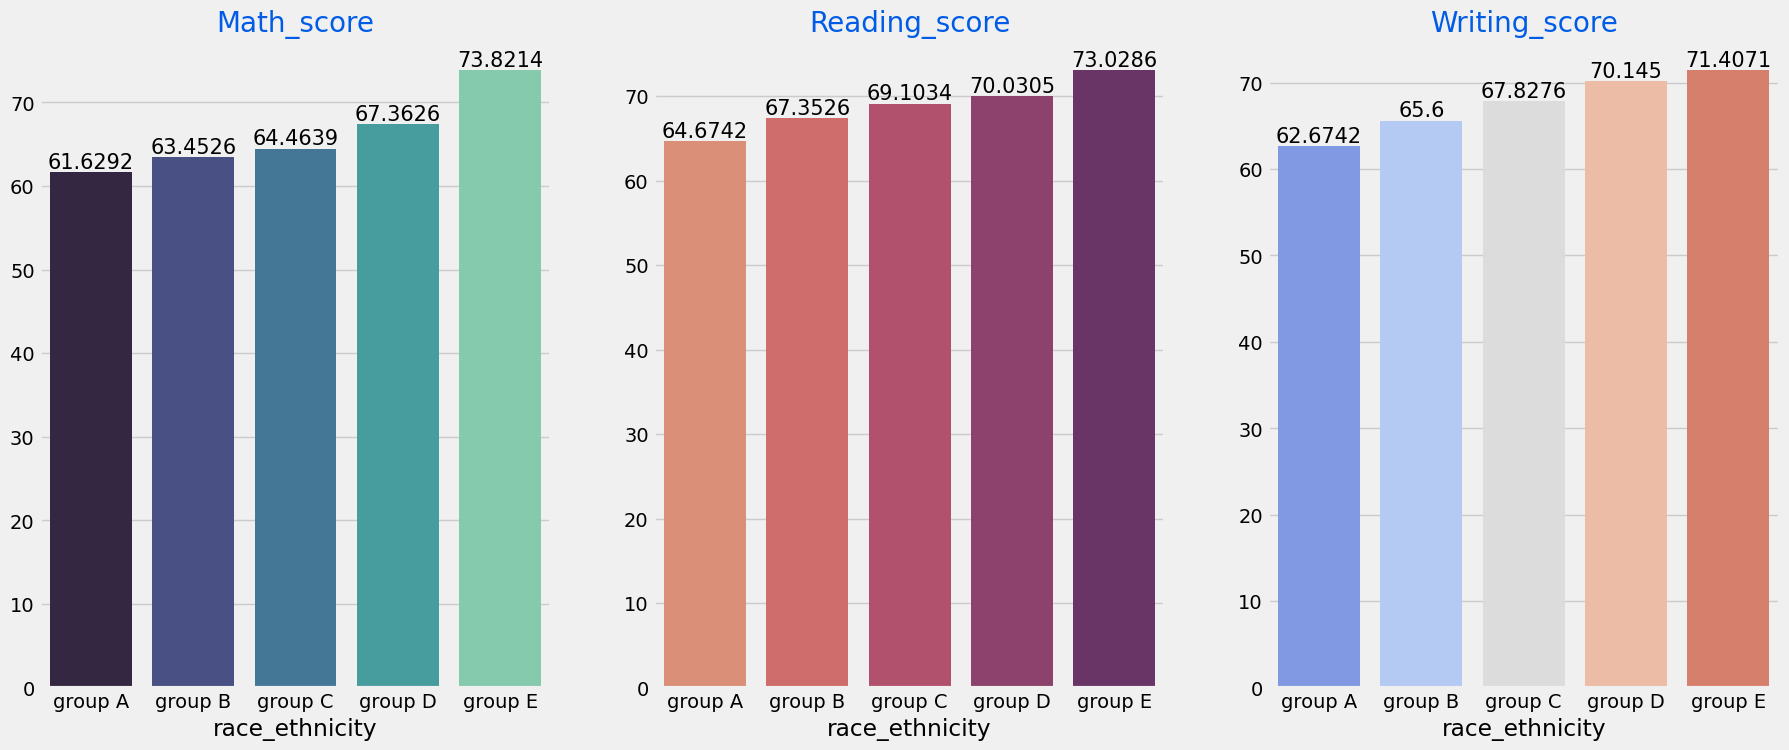

In [106]:
Group_data2 = df.groupby('race_ethnicity')
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

####  PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

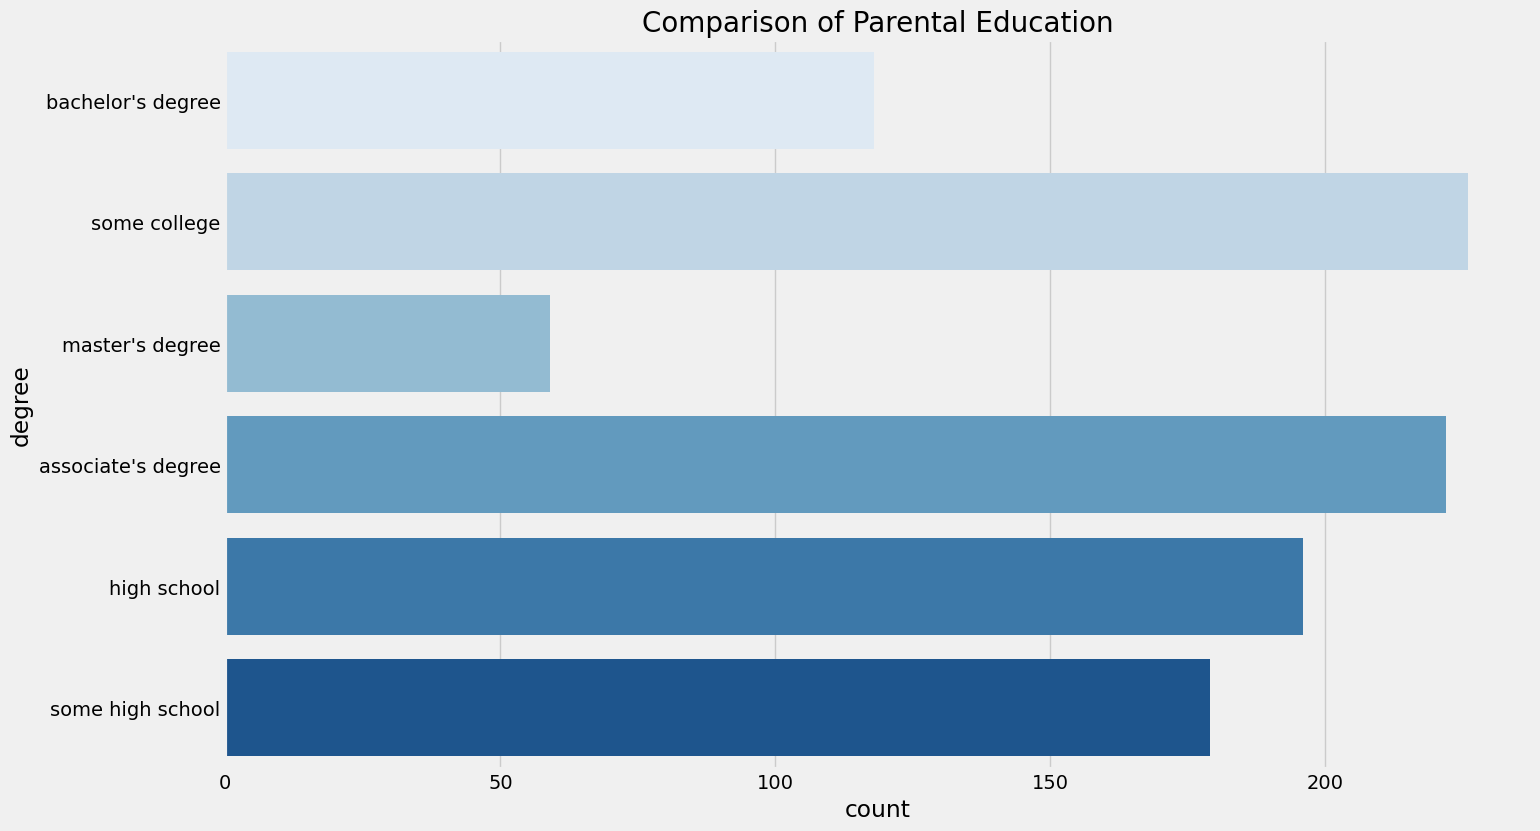

In [99]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('degree')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

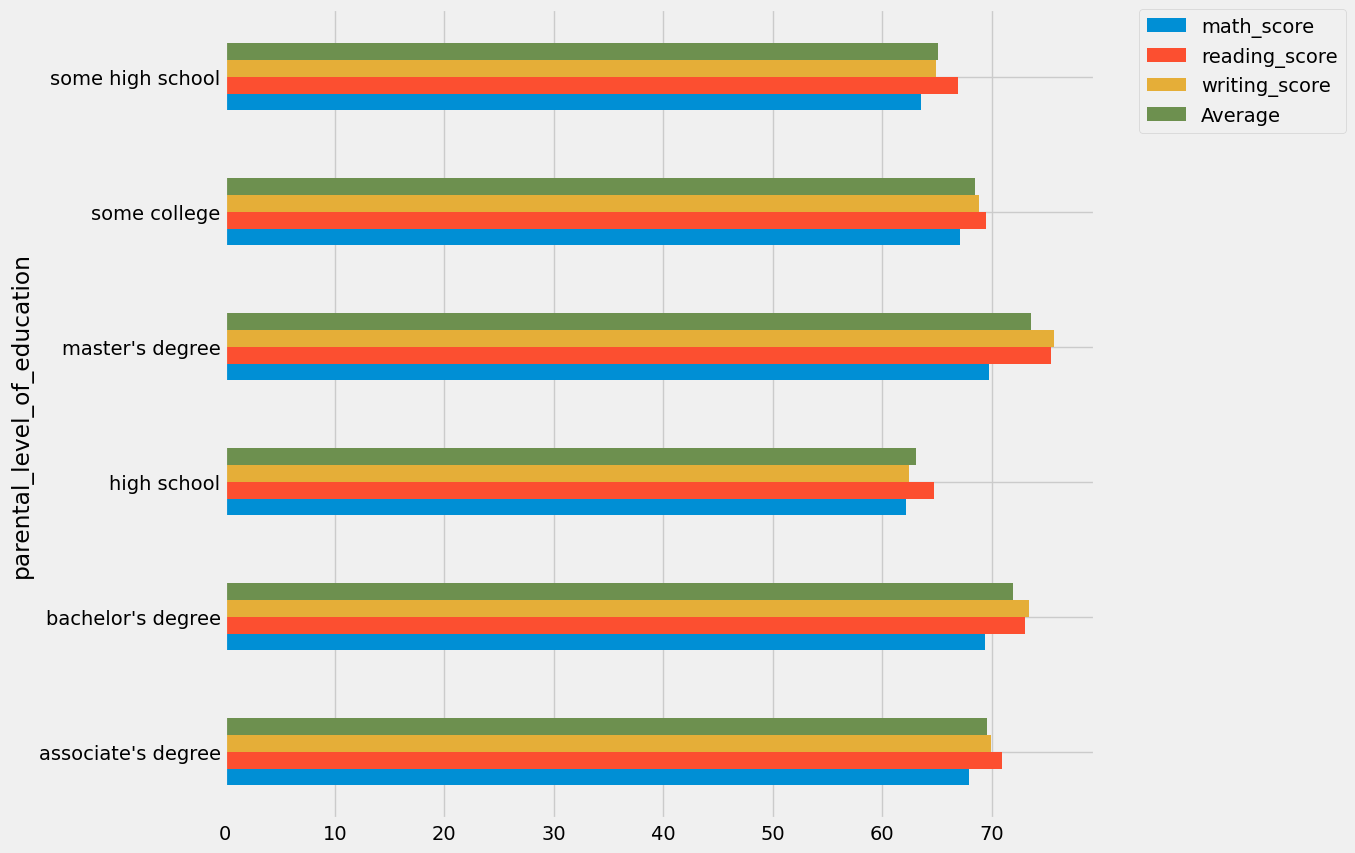

In [113]:
df.groupby('parental_level_of_education')[['math_score','reading_score','writing_score','Average']].mean().plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

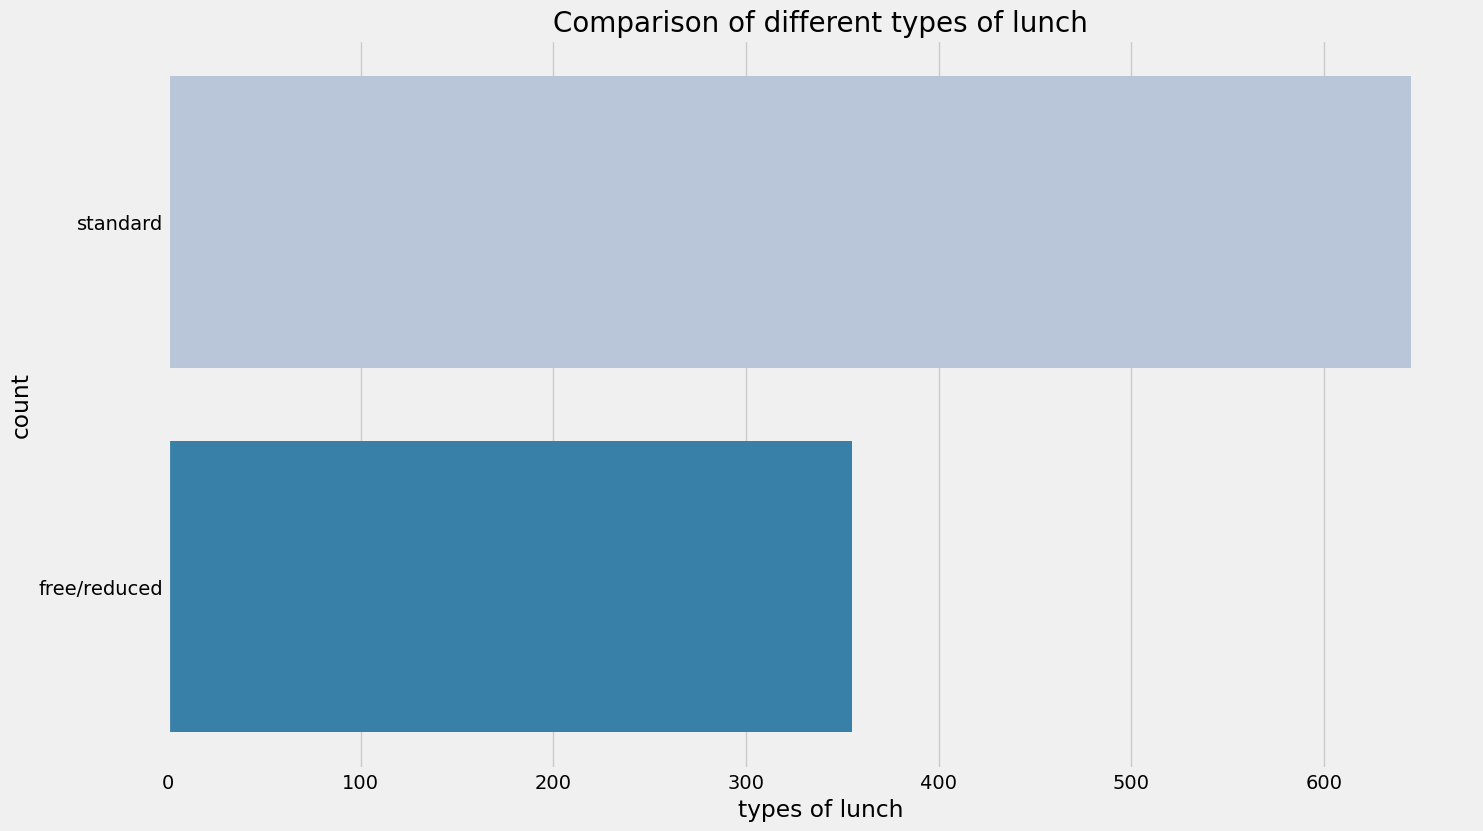

In [124]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

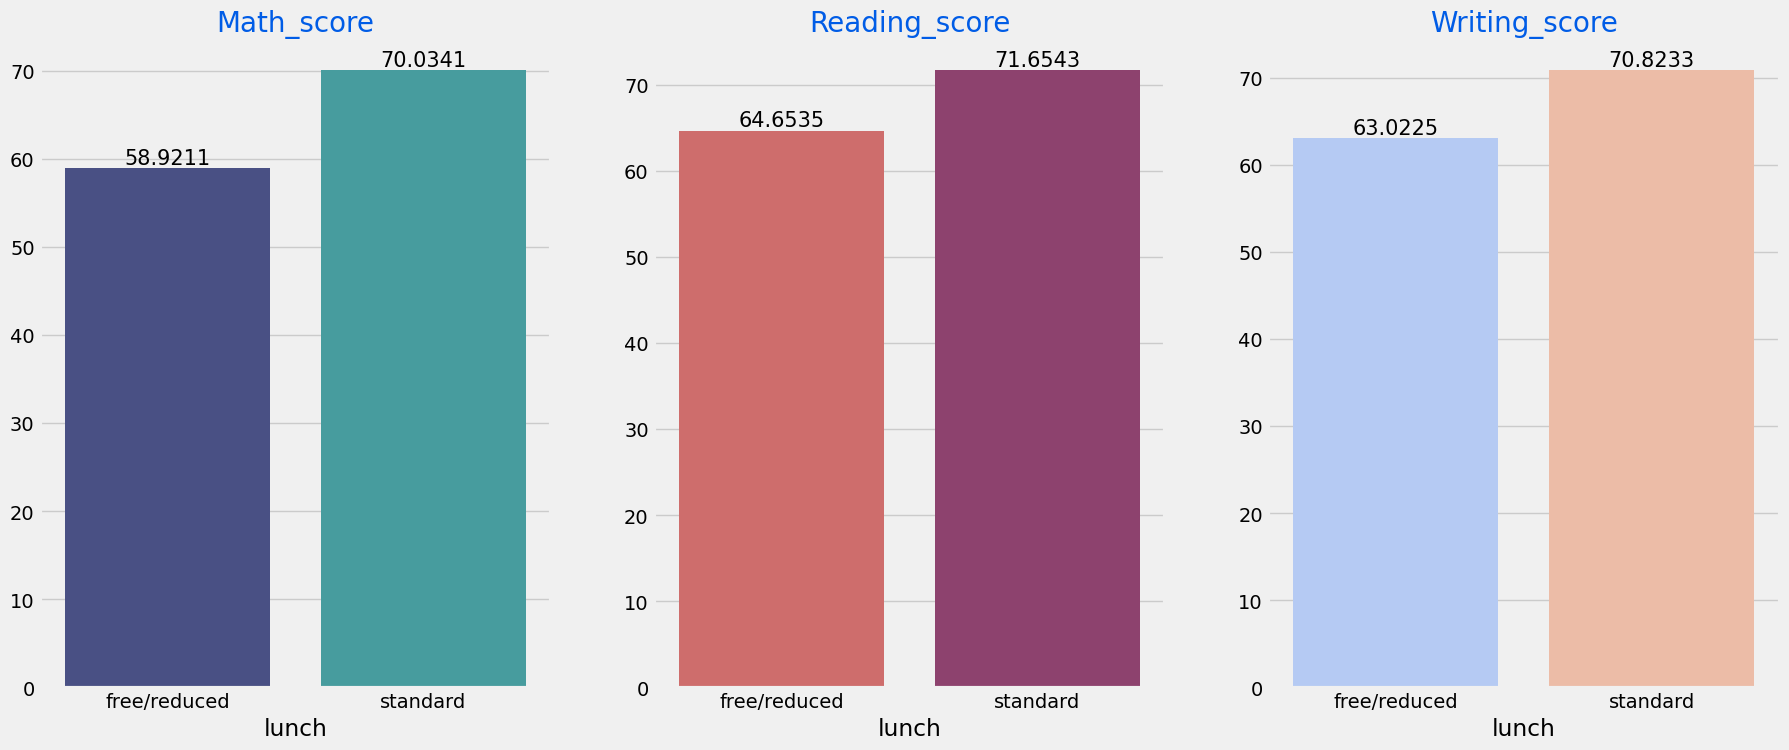

In [127]:
Group_data3 = df.groupby('lunch')
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data3['math_score'].mean().index,y=Group_data3['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['reading_score'].mean().index,y=Group_data3['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['writing_score'].mean().index,y=Group_data3['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- what is the count of students who have done the test preparation course?
- Is Test prepration course has any impact on student's performance ?

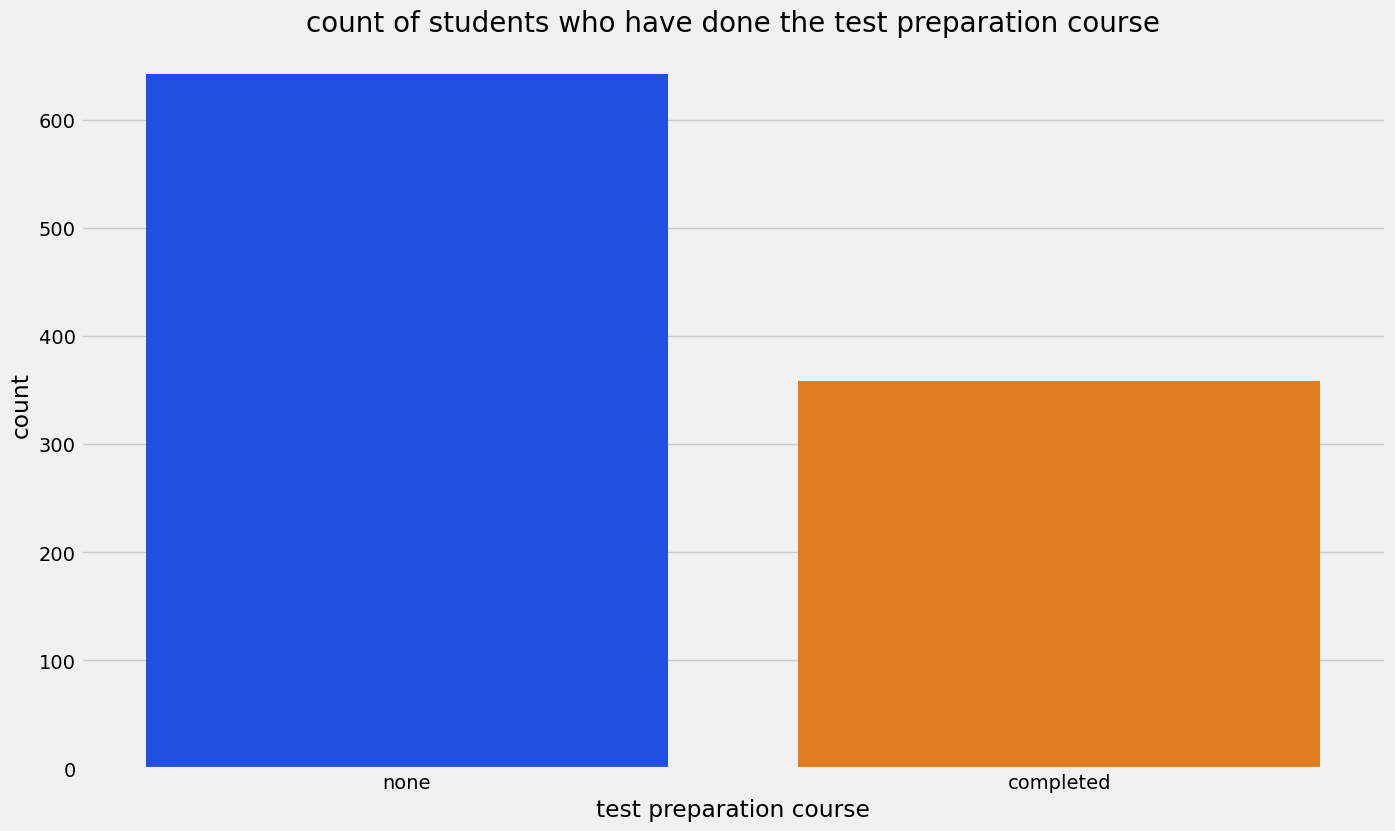

In [135]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x=df["test_preparation_course"],data=df,palette='bright')
plt.title('count of students who have done the test preparation course', fontweight = 30, fontsize = 20)
plt.xlabel('test preparation course')
plt.ylabel('count')
plt.show()


Insights:

The number of students who have not done the test preparation course is high

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

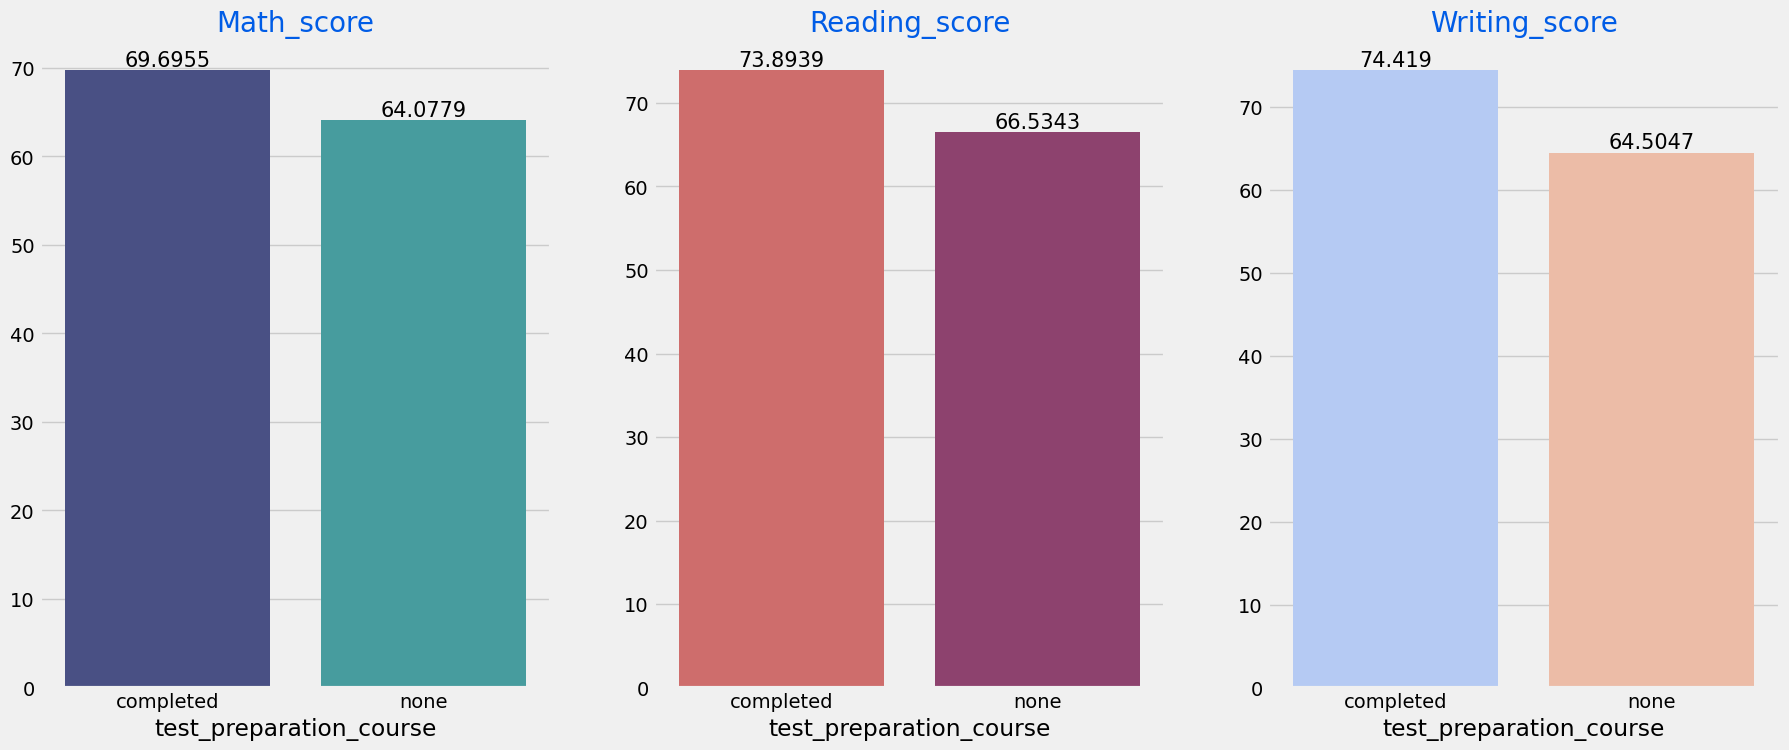

In [136]:
Group_data4 = df.groupby('test_preparation_course')
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data4['math_score'].mean().index,y=Group_data4['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data4['reading_score'].mean().index,y=Group_data4['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data4['writing_score'].mean().index,y=Group_data4['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

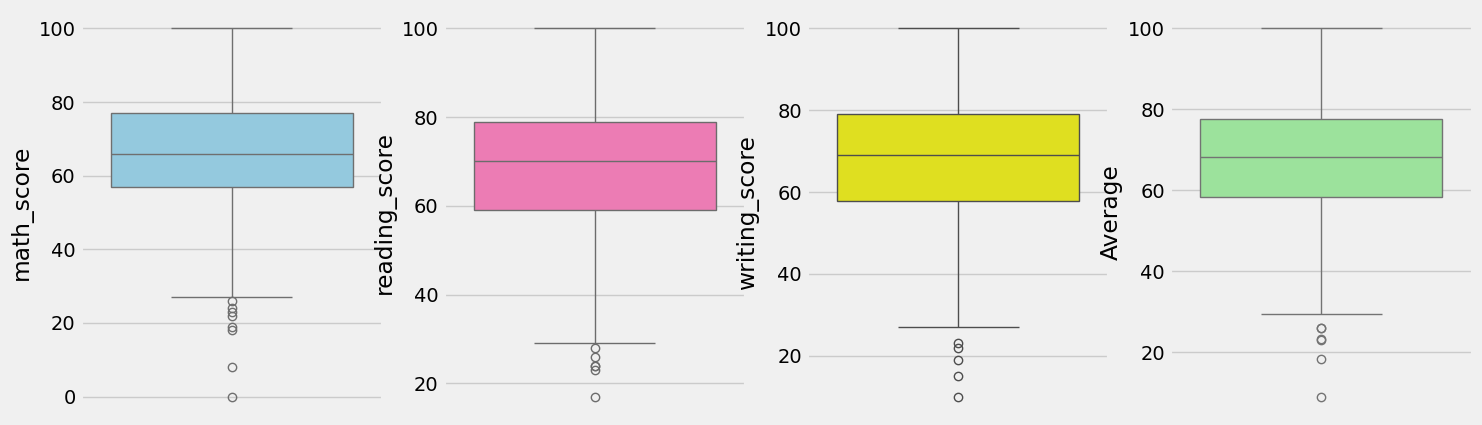

In [137]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

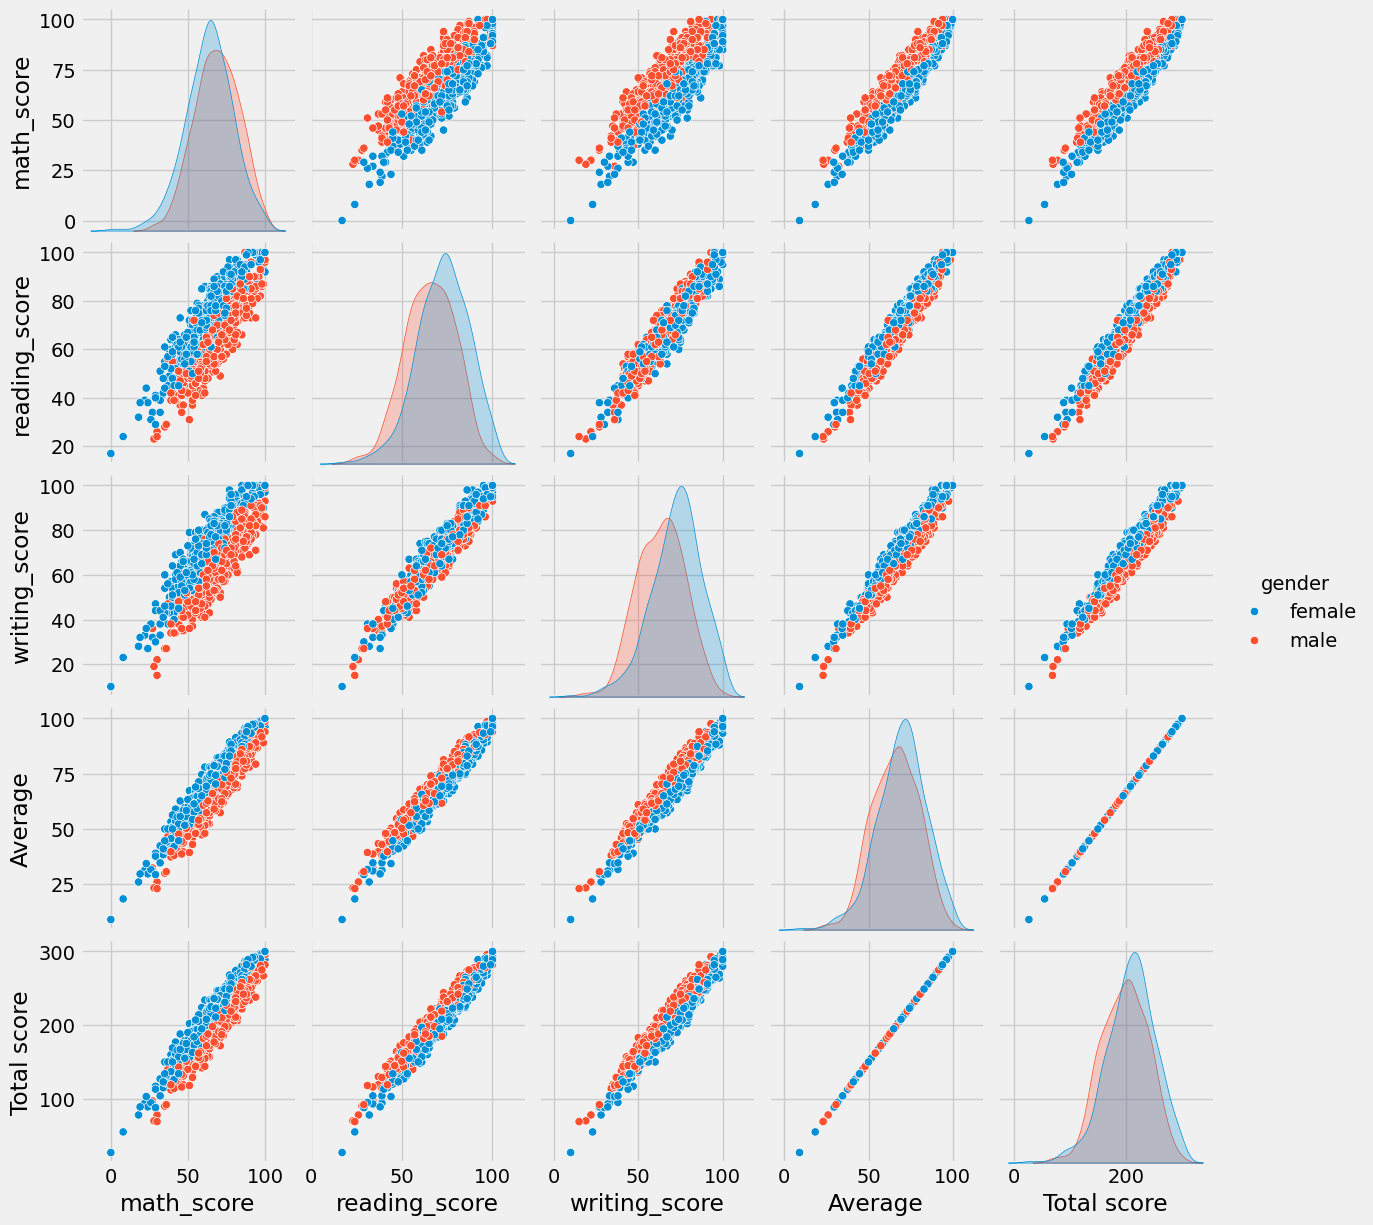

In [138]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Finishing preparation course is benefitial.